# Chapter 3 Control Flow and Functions¶
Julia as a Second Language, Erik Engheim Chapter 3 Control Flow

Topics

1. Using Boolean values in conditions
2. Running the same code multiple times using while and for loops
3. Deciding what code to run with an if statement
4. Looping over ranges of numbers
5. Defining functions spanning multiple lines of code
6. Implementing control flow using recursion or iteratio


References Julia 1.9.0 Manual
1. Chapter 5 Mathematical Operations and Elementary Functions (`Boolean Operators` and `Numeric Comparisons`)
2. Chapter 8 Functions
3. Chapter 9 Control Flow

## Numeric Comparison and Boolean Operators

Standard comparison operations are defined for all the primitive numeric types:

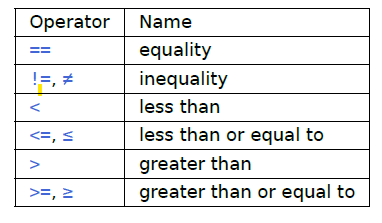


## Boolean expressions

In [ ]:
3 > 5

In [ ]:
x = 6

In [ ]:
1 ≤ x && x < 8

In [ ]:
1 ≤ x < 10  # is x (less tnan or equal to 3) and (less than 10)

In [ ]:
typeof(3>5)

In [ ]:
reinterpret(UInt8, false)

In [ ]:
reinterpret(UInt8, true)

In [ ]:
?reinterpret

Boolean values can be used in arithmetic expressions

In [ ]:
true + false

In [ ]:
3 * true

## Boolean Operators

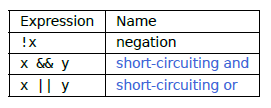

In [ ]:
x = 3

In [ ]:
x < 4 || x > 10

In [ ]:
x > 4 && x < 10

In [ ]:
4 < x < 10

In [ ]:
4 < 7 < 10

## Control Flow

Julia provides a variety of control flow constructs:

* Compound Expressions: `begin .. end` and `;`.
* Conditional Evaluation: `if-elseif-else` and `?:` (ternary operator).
* Short-Circuit Evaluation: logical operators `&&` (“and”) and `||` (“or”), and also chained comparisons.
* Repeated Evaluation: Loops: `while` and `for`.
* Exception Handling: `try-catch`, `error` and `throw`.
* Tasks (aka Coroutines): `yieldto`.

> The first five control flow mechanisms are standard to high-level programming languages. Tasks are not so standard: they provide non-local control flow, making it possible to switch between temporarily-suspended computations. This is a powerful construct: both exception handling and cooperative multitasking are implemented in Julia using tasks. Everyday programming requi


## Compound Expressions

Sometimes it is convenient to have a single expression which evaluates several subexpressions in order, returning the value of the last subexpression as its value. There are two Julia constructs that accomplish this: begin blocks and ; chains. The value of both compound expression constructs is that of the last subexpression. Here's an example of a begin block:

In [ ]:
z = begin
        x = 1
        y = 2
        x + y
    end

In [ ]:
z = (x = 1; y = 2; x + y)

In [ ]:
begin x = 1; y = 2; x + y end

In [ ]:
(x = 1; y = 2; x + y)

## Conditional Evaluation
Conditional evaluation allows portions of code to be evaluated or not evaluated depending 
on the value of boolean expression. Here is the anatomy of the if-elseif-else conditional syntax:

In [ ]:
x = 10;
y = 12;

if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end

The so-called "ternary operator", ?:, is closely related to the if-elseif-else syntax, but is used where
a conditional choice between single expression values is required, as opposed to conditional execution
of longer blocks of code. It gets its name from being the only operator in most languages taking three
operands:
`a ? b : c`

In [ ]:
x = 1; y = 2;
println(x < y ? "less than" : "not less than")

## `while`Looping

There are two constructs for repeated evaluation of expressions: the `while` loop and the `for` loop. 
We consider `while` first.

**syntax**

    `while <boolean-expression>
        <body>
      end`

In [ ]:
i = 0
while i < 5
    i = i + 1
end

In [ ]:
i = 0
while i < 5
    i = i + 1
    println(i)
end

In [ ]:
print("Enter a positive number: ")
line = readline()
n = parse(Int64, line)

i = 0
s = 0
while i ≤ n
    s += 1
    i += 1
end
println("The sum of 1 to $n is $s")

In [ ]:
?parse

## Making a mathematical table for the sin function in  degree

In [ ]:
# Making a mathematical table for sin using the sin function
angle = 0
while angle <= 90
    rad = deg2rad(angle)
    x = sin(rad)
    println("sin($angle", "°) = $x")
    angle = angle + 15
end

In [ ]:
# Making a mathematical table for sin using the sind function
angle = 0
while angle <= 90
    x = sind(angle)
    println("sin($angle", "°) = $x")
    angle = angle + 15
end

## `for` Loops

### Range objects

When reading normal Julia code you will find that looping based on conditions is, in
fact, not the normal approach. Instead loops tend to be defined using range objects;
ranges are constructed with the `:` operator.

In [ ]:
1:10, typeof(1:10)

In [ ]:
1:2:10, typeof(1:2:10)

In [ ]:
10:-1:1

In [ ]:
?:

In [ ]:
rand(1:2, 10) # uniform random sequence of 1 and 2

In [ ]:
rand(1:2:5, 10) # uniform random sequence of 1, 3, 5

### `for` Loops Examples

In [ ]:
for i in 0:4
    println(i)
end

In [ ]:
for angle in 0:15:90
    println(angle)
end

In [ ]:
# Making a mathematical table for sin using the sind function
for angle in 0:15:90
    x = sind(angle)
    println("sin($angle", "°) = $x")
end

In [ ]:
v = []
for x in 1:10
    push!(v, x^2-1)
end
v

In [ ]:
# using comprehension instead
v = [x^2-1 for x in 1:10]

## Multiline Functions

In [ ]:
function add(x,y)
    x+y               # last expression value is returned
end

In [ ]:
add(2,3)

In [ ]:
reduce(add, 1:5)

In [ ]:
function x²(x)
    x*x
end

In [ ]:
x²(10)

In [ ]:
map(x², 1:10)

In [ ]:
"""
    Print sin function table from 0° to max_ange° in the increment of increment°

"""
function print_sin_table(increment, max_angle)
    angle = 0
    while angle <= max_angle
        rad = deg2rad(angle)
        x = sin(rad)
        println("sin($angle", "°) = $x")
        angle = angle + increment
    end
end

In [ ]:
print_sin_table(15, 90)

## Implemention of the sin function using the Taylor series.

A popular method of calculating sine is called the Taylor series:

   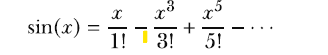 
   
or in more compact form

   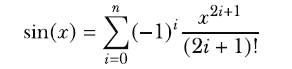

In [ ]:
""" 
    sine implements sin function using the Taylor series (compact form).
    The default argument, n, is the number of terms used and 
    the keyword argument, degree, is a switch between degree and radian

"""
function sine(x, n = 5; degree = true)
    total = 0
    if degree 
        r = deg2rad(x) 
    else 
        r = x
    end
    for i in 0:n
        total += (-1)^i*r^(2i+1)/factorial(big(2i + 1))
    end
    total
end

In [ ]:
sine(90)

In [ ]:
sine(90, 10)

In [ ]:
sine(degree = false, 0.5pi, 10)

In [ ]:
# Making a mathematical table for the sine function
for angle in 0:15:90
    x = sine(angle)
    println("sin($angle", "°) = $x")
end

In [ ]:
# Making a mathematical table for the sine function- timing
# 0.0001 increment took about 4 seconds
@time "sine timing" begin
    for angle in 0:0.0001:90
        x = sine(angle)
        # println("sin($angle", "°) = $x")
    end
end

In [ ]:
?@time

### factorial function

In [ ]:
# factorial function defined Julia-base (combinatorics.jl line 27) 
factorial(10)

In [ ]:
# factorial of 10 to 15
factorial.(1:15)

In [ ]:
# factorial of 16 to 20
factorial.(16:20)

In [ ]:
# factorial of 21 is too big for Int64
factorial(21)

In [ ]:
println("factoria(21) = ", factorial(big(21)))
println("factoria(20) = ", factorial(20))
println("Int64 max =    ", typemax(Int64))

In [ ]:
# Implement factorial using a recursive function
function factorial_rec(n)
    if n ≤ 1
        return n
    end
        return n * factorial(n-1)
end

In [ ]:
factorial_rec(20)

In [ ]:
factorial_rec(21) # why overflow?

In [ ]:
factorial_rec(big(21))

In [ ]:
factorial_rec(Int8(10))  # Why no Int8 overflow

In [ ]:
typeof(factorial_rec(Int8(10)))

In [ ]:
typeof(factorial_rec(Int8(1)))

In [ ]:
typeof(Int8(2)*Int8(4))

In [ ]:
t=Int16
a = t(78)

In [ ]:
typeof(a)

### Fibonacci number

Implemented using recursive function:

In [ ]:
function fib(n)
    if n ≤ 0
        0
    elseif n == 1
        1
    else
        fib(n-1) + fib(n-2)
    end
end

In [ ]:
fib(10)

In [ ]:
fib(20)

In [ ]:
fib(8.5)

In [ ]:
fib("abc")

### Fibonacci number

Implemented using Matrix and vector multiplication

In [ ]:
fib_1(n) = first([1 1;1 0]^(n-1)*[1,0])
fib_2(n) = last( [1 1;1 0]^(n-1)*[1,1])

In [ ]:
fib(40), fib_1(40), fib_2(40)

In [ ]:
@time fib(45) # it took close to 6 seconds

In [ ]:
@time fib_1(45)

In [ ]:
@time fib_2(45)

In [ ]:
@time fib(50)  # it took close to 65 seconds

In [ ]:
@time fib_1(50)

In [ ]:
@time fib_2(50)

## Exception Handling
When an unexpected condition occurs, a function may be unable to return a reasonable value to its caller. In such cases, it may be best for the exceptional condition to either terminate the program while printing a diagnostic error message, or if the programmer has provided code to handle such exceptional circumstancesthen allow that code to take the appropriate action.

### Built-in Exceptions

Exceptions are thrown when an unexpected condition has occurred. The built-in Exceptions listed below
all interrupt the normal flow of control.
For example, the sqrt function throws a DomainError if applied to a negative real value:

In [ ]:
sqrt(-1)

You may define your own exceptions in the following way:
`struct MyCustomException <: Exception end`
Julia allows exception handling through the use of a try-catch block. The block of code that can possibly throw an exception is placed in the try block and the catch block handles the exception thrown. The exception propagates through the call stack until a try-catch block is found. Let us consider the following code, Here we try to find the square root of -1 which throws “DomainError” and the program terminates. 


In [ ]:
println("Before Exception")
try
    sqrt(-1)
catch
    println("Cannot find the square root of negative numbers")
end
println("After Exception")

The try-catch block also allows the exception to be stored in a variable. The method of using the catch block to handle multiple types of Exception is called Canonical method. The following example calculates the square root of the third element of x if x is indexable, otherwise assumes x is a real number and returns its square root. 

In [ ]:
sqrt_third(x) = try
        println(sqrt(x[3]))
    catch y
        if isa(y, DomainError)
            println(sqrt(complex(x[3], 0)))
        elseif isa(y, BoundsError)
            println(sqrt(x))
        end
    end
 
 
sqrt_third([1 9 16 25])
sqrt_third([1 -4 9 16])
sqrt_third(25)
sqrt_third(-9)

Use of Finally clause
The finally block runs irrespective of the occurrence of an exception. Code inside the finally block can be used to close resources like opened files or other cleanup work. 

In [ ]:
try
    f = open("file.txt")
catch
    println("No such file exists")
finally
    println("After exception")
end

Throwing An Exception
The throw() function can be used to throw custom exceptions. The following examples shows an error being thrown from a function and handled by the catch block. The error() function is used to produce an ErrorException. 

In [ ]:
function f(x)
    if(x < 5)
        throw(error())
    end
    return sqrt(x)
end
 
try
    println(f(9))
    println(f(1))
catch e
    println("Argument less than 5")
end

Exceptions can also be thrown from the catch block. The catch block may include some code to handle the caught exception and then rethrow an exception. This exception must be handled by another try-catch block in the same method or any other method in the call stack. The exception propagates all throughout to the main function if it is left uncaught. 

In [ ]:
function f(x)
    if(x < 5)
        throw(error())
    end
    return sqrt(x)
end
 
try
    println(f(9))
    println(f(1))
catch e
    println("Argument less than 5")
    throw(error())
end

In [ ]:
function f(x)
    if(x < 5)
        throw(error())
    end
    return sqrt(x)
end
 
try
    try
        println(f(9))
        println(f(1))
    catch e
        println("Argument less than 5")
        throw(error())
    end
catch e
    println("Second catch block")
end